In [3]:
import datetime
import wbdata as wb
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
date = (datetime.datetime(2000,1,1),datetime.datetime(2018,1,1))
countries = ['RUS']
indicators = {'NY.GDP.MKTP.CN': 'Nominal GDP', 
              'NE.CON.PRVT.CN': 'Nominal private consumption', 
              'NE.CON.GOVT.CN': 'Nominal government expenditure',
              'NE.GDI.TOTL.CN': 'Nominal gross capital formation',
              'NE.EXP.GNFS.CN': 'Nominal export',
              'NE.IMP.GNFS.CN': 'Nominal import',
              'NY.GDP.MKTP.KN': 'Real GDP', 
              'NE.CON.PRVT.KN': 'Real private consumption',
              'NE.CON.GOVT.KN': 'Real government expenditure',
              'NE.GDI.TOTL.KN': 'Real gross capital formation',
              'NE.EXP.GNFS.KN': 'Real export',
              'NE.IMP.GNFS.KN': 'Real import',}
GDP = wb.get_dataframe(indicators, country= countries, data_date = date, convert_date = False)
for i in GDP.columns:
    GDP[i] = GDP[i]/1000000000
GDP = GDP.sort_index(ascending = True)

In [5]:
GDP['Nominal net export'] = GDP['Nominal export'] - GDP['Nominal import']
GDP['Real net export'] = GDP['Real export'] - GDP['Real import']
Nominal = GDP.iloc[:, [1,2,3,12]]
Real = GDP.iloc[:, [7,8,9,13]]
Nom_indicators = GDP.columns[[1,2,3,12]]
Real_indicators = GDP.columns[[7,8,9,13]]

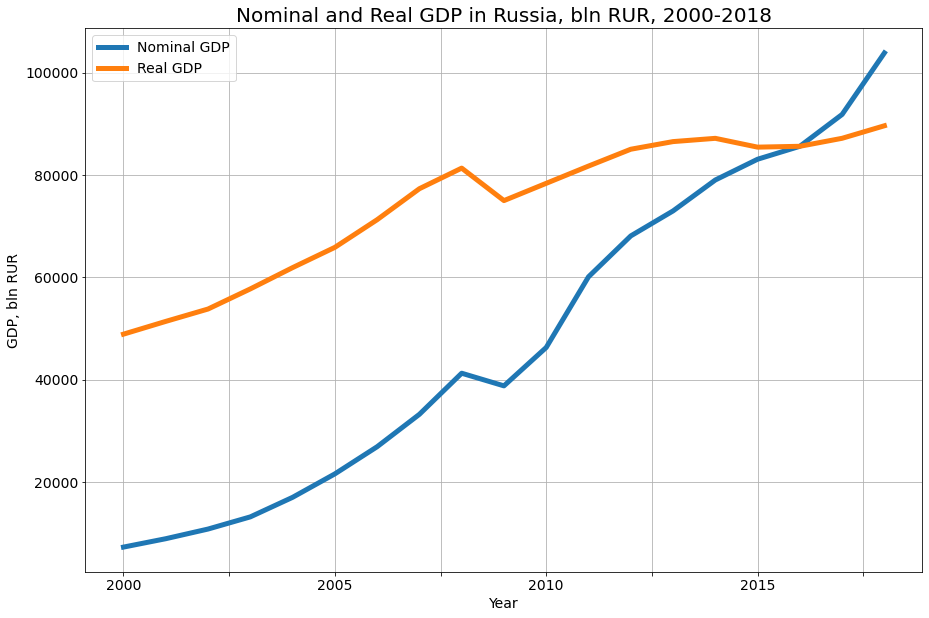

In [6]:
ax = plt.gca()
GDP.plot(kind = 'line', y = 'Nominal GDP', ax = ax, figsize = (15,10), grid = True, fontsize = 14, linewidth = 5)
GDP.plot(kind = 'line', y = 'Real GDP', ax = ax, figsize = (15,10), grid = True, fontsize = 14, linewidth = 5)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('GDP, bln RUR', fontsize = 14)
plt.legend(fontsize = 14)
plt.title('Nominal and Real GDP in Russia, bln RUR, 2000-2018', fontsize = 20)
plt.show()

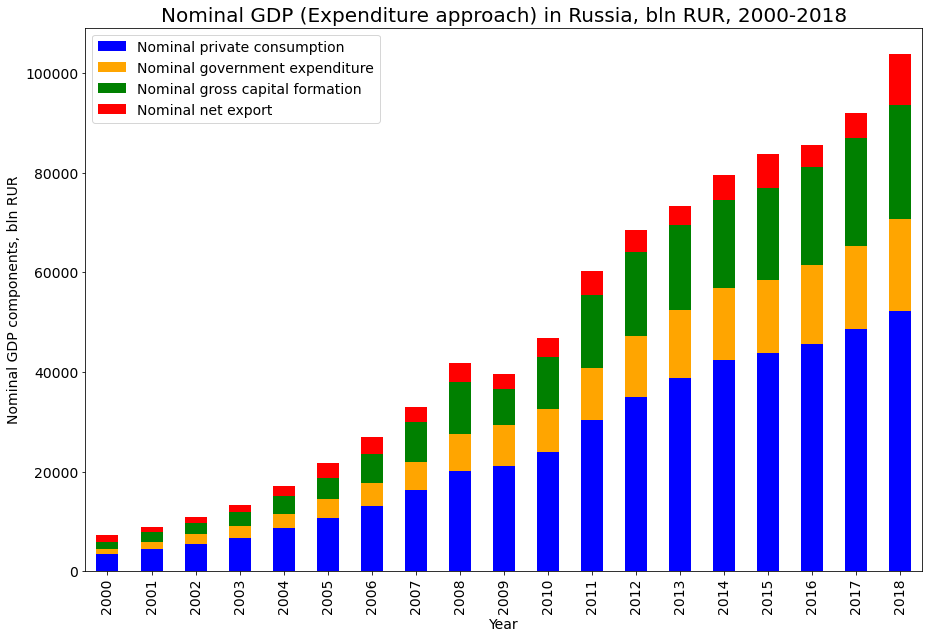

In [7]:
colors = ['blue', 'orange', 'green', 'red']
Nominal.plot.bar(stacked = True, color = colors, figsize = (15,10), fontsize = 14)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Nominal GDP components, bln RUR', fontsize = 14)
plt.legend(fontsize = 14)
plt.title('Nominal GDP (Expenditure approach) in Russia, bln RUR, 2000-2018', fontsize = 20)
plt.show()

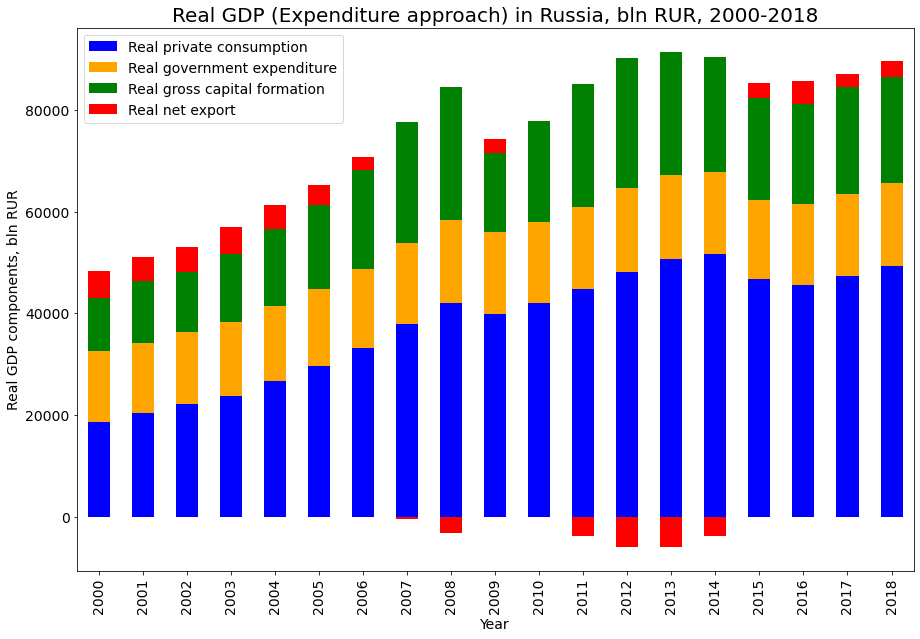

In [8]:
colors = ['blue', 'orange', 'green', 'red']
Real.plot.bar(stacked = True, color = colors, figsize = (15,10), fontsize = 14)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Real GDP components, bln RUR', fontsize = 14)
plt.legend(fontsize = 14)
plt.title('Real GDP (Expenditure approach) in Russia, bln RUR, 2000-2018', fontsize = 20)
plt.show()

In [12]:
date = (datetime.datetime(2000,1,1),datetime.datetime(2018,1,1))
countries = ['RUS']
indicators = {'SL.TLF.TOTL.IN': 'Labor force', 
              'NY.GDP.MKTP.KN': 'Real GDP', 
              'NE.GDI.TOTL.KN': 'Real gross capital formation'}
Growth = wb.get_dataframe(indicators, country= countries, data_date = date, convert_date = False)
for i in Growth.columns:
    Growth[i] = Growth[i]/1000000000
Growth = Growth.sort_index(ascending = True)

#Growth['GDP Growth'] = wb.get_dataframe('NY.GDP.MKTP.KD.ZG', country= countries, data_date = date, convert_date = False)

In [13]:
Growth.head()

,Labor force,Real GDP,Real gross capital formation
date,,,
2000,0.073313,48910.393496,10356.458918
2001,0.072008,51404.848619,12085.939138
2002,0.072965,53820.872345,11771.740963
2003,0.072845,57749.770378,13455.102989
2004,0.073570,61907.723740,15096.661412
